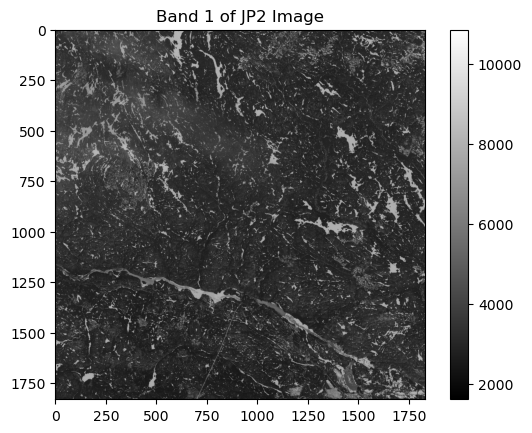

In [18]:
!pip install rasterio
import rasterio
import matplotlib.pyplot as plt

# Open a JP2 file
#loading in the data from the datafile, band by band
with rasterio.open("T17TQM_20250120T161601_B01.jp2") as dataset:
    # Read the first band as a NumPy array
    image_data = dataset.read(1)
# Plot the image data (first band)
plt.imshow(image_data, cmap='gray')
plt.title("Band 1 of JP2 Image")
plt.colorbar()
plt.show()


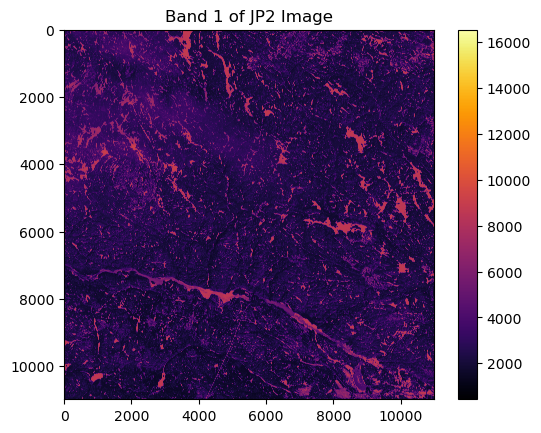

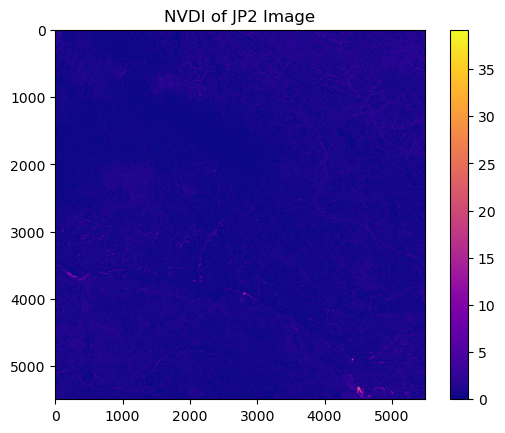

In [60]:
#importing and loading the infared red and red bands (band 5 and band 4 respectively @ 20m)
!pip install rasterio
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage

# Open a JP2 file
#loading in the red band 
with rasterio.open("T17TQM_20250120T161601_B04.jp2") as dataset:
    # Read the first band as a NumPy array
    image_data1 = dataset.read(1)
    
# Open a JP2 file
#loading in the infared red band 
with rasterio.open("T17TQM_20250120T161601_B05.jp2") as dataset:
    # Read the first band as a NumPy array
    image_data2 = dataset.read(1)

# Plot the image using a color map (e.g., 'viridis', 'plasma', 'inferno')
plt.imshow(image_data1, cmap='inferno')
plt.title("Band 1 of JP2 Image")
plt.colorbar()
plt.show()



# Now both red_band and resized_nir_band have the same shape
'''print(image_data1)
print(image_data2)
print(len(image_data1))'''
#calculating the NVDI for the bands which make up the red and the infared red
red = image_data1
nir = image_data2

# Example: Assuming red_band is smaller (5490, 5490) and nir_band is larger (10980, 10980)
resized_red_band = scipy.ndimage.zoom(red, (nir.shape[0] / red.shape[0], 
                                                nir.shape[1] / red.shape[1]), order=3)
ndvi = (nir - resized_red_band)/ (nir + resized_red_band)


#plot the NVDI
plt.imshow(ndvi, cmap='plasma')
plt.title("NVDI of JP2 Image")
plt.colorbar()
plt.show()
